In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [27]:
df = pd.read_csv('data_decision_tree_bt.csv')
print(df.head(5))

   TT       DoHaiLong   LoaiKhachHang  Tuoi                 LoaiHinh  \
0   0  Không Hài Lòng  KH Bình Thường    29  Đi Cùng Gia Đình/Bạn Bè   
1   1  Không Hài Lòng  KH Trung Thành    44  Đi Cùng Gia Đình/Bạn Bè   
2   2        Hài Lòng  KH Trung Thành    48  Đi Cùng Gia Đình/Bạn Bè   
3   3        Hài Lòng  KH Bình Thường    45  Đi Cùng Gia Đình/Bạn Bè   
4   4  Không Hài Lòng  KH Trung Thành    49               Đi Cá Nhân   

   DoTrePhut  GheNgoi  ThucAn  GateLocation  DichVuGuiXe  BauKhongKhiTranDau  \
0       15.0        5       5             4            5                   2   
1        0.0        4       5             5            3                   1   
2        0.0        5       2             1            4                   2   
3        0.0        5       5             4            3                   2   
4        0.0        4       4             2            4                   1   

   ChatLuongTranDau  TraiNghiemDatVeOnline  ChatLuongCacDichVuDiKem  DoAnToan  \
0    

In [28]:
df.dtypes

TT                           int64
DoHaiLong                   object
LoaiKhachHang               object
Tuoi                         int64
LoaiHinh                    object
DoTrePhut                  float64
GheNgoi                      int64
ThucAn                       int64
GateLocation                 int64
DichVuGuiXe                  int64
BauKhongKhiTranDau           int64
ChatLuongTranDau             int64
TraiNghiemDatVeOnline        int64
ChatLuongCacDichVuDiKem      int64
DoAnToan                     int64
ThoiTiet                     int64
SuSachSe                     int64
FanDoiNha                    int64
ThietKeLoiDi                 int64
dtype: object

In [29]:
print(df['DoHaiLong'].unique())
print(df['LoaiKhachHang'].unique())
print(df['LoaiHinh'].unique())

['Không Hài Lòng' 'Hài Lòng']
['KH Bình Thường' 'KH Trung Thành']
['Đi Cùng Gia Đình/Bạn Bè' 'Đi Cá Nhân']


In [30]:
df.isnull().sum()

TT                           0
DoHaiLong                    0
LoaiKhachHang                0
Tuoi                         0
LoaiHinh                     0
DoTrePhut                  388
GheNgoi                      0
ThucAn                       0
GateLocation                 0
DichVuGuiXe                  0
BauKhongKhiTranDau           0
ChatLuongTranDau             0
TraiNghiemDatVeOnline        0
ChatLuongCacDichVuDiKem      0
DoAnToan                     0
ThoiTiet                     0
SuSachSe                     0
FanDoiNha                    0
ThietKeLoiDi                 0
dtype: int64

In [31]:
df_clean = df.dropna()

In [32]:
df_clean = pd.get_dummies(df_clean, drop_first=True, dtype=int)

In [33]:
print(df['DoHaiLong'][:5])

0    Không Hài Lòng
1    Không Hài Lòng
2          Hài Lòng
3          Hài Lòng
4    Không Hài Lòng
Name: DoHaiLong, dtype: object


In [34]:
df_clean.dtypes

TT                                    int64
Tuoi                                  int64
DoTrePhut                           float64
GheNgoi                               int64
ThucAn                                int64
GateLocation                          int64
DichVuGuiXe                           int64
BauKhongKhiTranDau                    int64
ChatLuongTranDau                      int64
TraiNghiemDatVeOnline                 int64
ChatLuongCacDichVuDiKem               int64
DoAnToan                              int64
ThoiTiet                              int64
SuSachSe                              int64
FanDoiNha                             int64
ThietKeLoiDi                          int64
DoHaiLong_Không Hài Lòng              int64
LoaiKhachHang_KH Trung Thành          int64
LoaiHinh_Đi Cùng Gia Đình/Bạn Bè      int64
dtype: object

In [35]:
print(df_clean['DoHaiLong_Không Hài Lòng'][:5])

0    1
1    1
2    0
3    0
4    1
Name: DoHaiLong_Không Hài Lòng, dtype: int64


In [36]:
df_clean = df_clean.rename(columns={
    'DoHaiLong_Không Hài Lòng': 'DoHaiLong',
    'LoaiKhachHang_KH Trung Thành': 'LoaiKhachHang',
    'LoaiHinh_Đi Cùng Gia Đình/Bạn Bè': 'LoaiHinh'})

In [37]:
# tạo nhãn
y = df_clean['DoHaiLong']
X = df_clean.drop(columns=['DoHaiLong'])

# tách bộ dữ liệu 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# xây dựng mô hình cây quyết định
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
tree_pred = tree.predict(X_test)

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

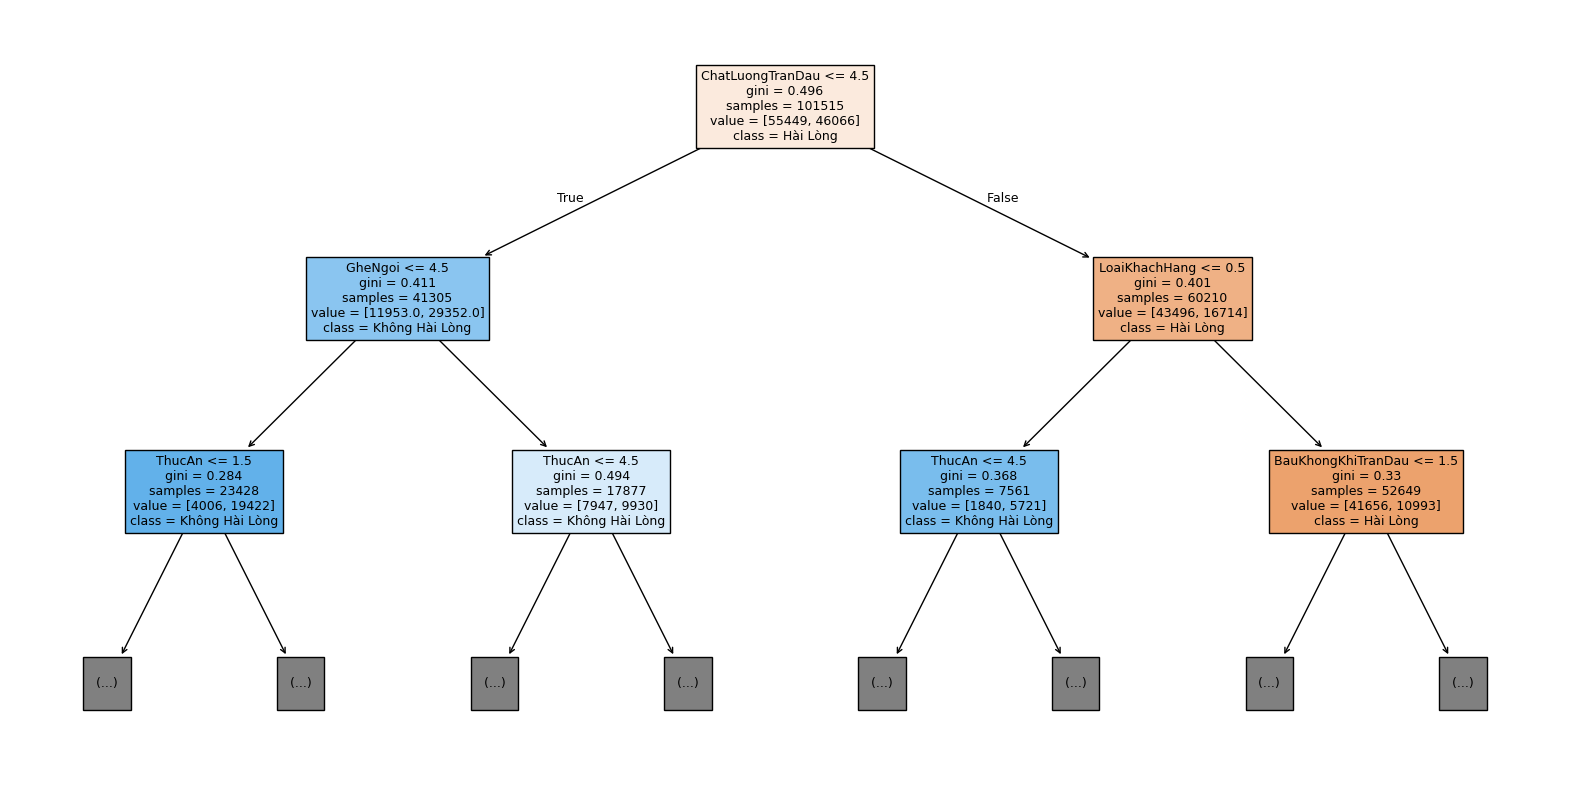

In [44]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, max_depth=2, feature_names=X.columns, class_names={1: 'Không Hài Lòng', 0: 'Hài Lòng'})
plt.show()

In [49]:
row = X_test.iloc[:10]
#print(row)
print(tree.predict(row))
print(y_test.iloc[:10])

[0 1 1 0 0 1 0 0 1 0]
4056      0
68201     1
91513     1
30645     0
64374     0
114079    1
91977     0
23591     0
66961     1
108518    0
Name: DoHaiLong, dtype: int64


In [50]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, tree_pred)
precision = metrics.precision_score(y_test, tree_pred)
recall = metrics.recall_score(y_test, tree_pred)
f1_score = metrics.f1_score(y_test, tree_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8855746877339533
Precision: 0.8724642794143588
Recall: 0.8715418502202643
F1 Score: 0.8720028208744711


In [51]:
hyper_params = {
    'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12]
}
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
finetuned_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(finetuned_tree,
                            hyper_params,
                            scoring=scoring,
                            cv=5,
                            refit='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [54]:
cv_results = pd.DataFrame(grid_search.cv_results_)
best_result_index = cv_results['mean_test_f1'].idxmax()
best_result = cv_results.iloc[best_result_index]

best_accuracy = best_result['mean_test_accuracy']
best_precision = best_result['mean_test_precision']
best_recall = best_result['mean_test_recall']
best_f1 = best_result['mean_test_f1']

print(f'Accuracy: {best_accuracy}')
print(f'Precision: {best_precision}')
print(f'Recall: {best_recall}')
print(f'F1 Score: {best_f1}')

Accuracy: 0.9001132837511697
Precision: 0.8951285025411291
Recall: 0.8833846511890139
F1 Score: 0.8892133899828656


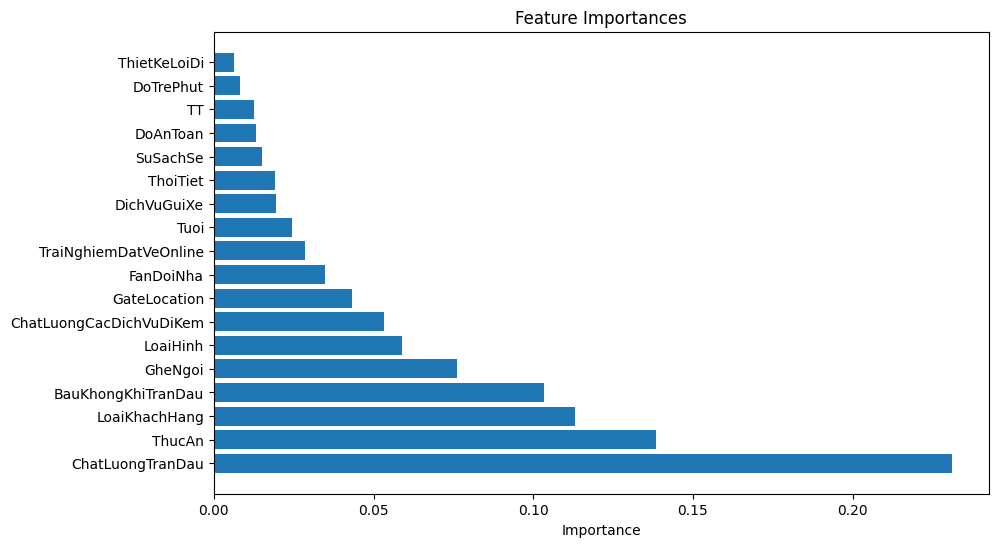

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_df = pd.Series(feature_importances, index=X.columns, name='Importance').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df.index, feature_importances_df.values)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
forest_pred = forest.predict(X_test)

In [58]:
forest_accuracy = metrics.accuracy_score(y_test, forest_pred)
forest_precision = metrics.precision_score(y_test, forest_pred)
forest_recall = metrics.recall_score(y_test, forest_pred)
forest_f1 = metrics.f1_score(y_test, forest_pred)

print(f'Accuracy: {forest_accuracy}')
print(f'Precision: {forest_precision}')
print(f'Recall: {forest_recall}')
print(f'F1 Score: {forest_f1}')

Accuracy: 0.9180030734071476
Precision: 0.9141274238227147
Recall: 0.9013215859030838
F1 Score: 0.9076793398695711


In [68]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 20, 40, 60, 80, 100, 200, 300, 400, 500]
max_depth = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 30, 50]

hyper_params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}
scoring = ['f1', 'precision', 'recall', 'accuracy']
forest = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(estimator=forest, 
                                 param_distributions=hyper_params, 
                                 n_iter=5, cv=5, 
                                 random_state=42, 
                                 refit='f1',
                                 scoring=scoring,
                                 )

rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 25, 30, 50],
                                        'n_estimators': [10, 20, 40, 60, 80,
                                                         100, 200, 300, 400,
                                                         500]},
                   random_state=42, refit='f1',
                   scoring=['f1', 'precision', 'recall', 'accuracy'])

In [70]:
cv_results = pd.DataFrame(rand_search.cv_results_)
best_result_index = cv_results['mean_test_f1'].idxmax()
best_result = cv_results.iloc[best_result_index]

best_accuracy = best_result['mean_test_accuracy']
best_precision = best_result['mean_test_precision']
best_recall = best_result['mean_test_recall']
best_f1 = best_result['mean_test_f1']

print(f'Accuracy: {best_accuracy}')
print(f'Precision: {best_precision}')
print(f'Recall: {best_recall}')
print(f'F1 Score: {best_f1}')

Accuracy: 0.9198837610205388
Precision: 0.9170784568882058
Recall: 0.905309715268892
F1 Score: 0.9111545025000695
